**Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Change Current Working Directory**

In [2]:
import os
os. chdir('/content/drive/MyDrive/Kwok_Bo_22454220_Code')

**Check the dataset is present**

In [3]:
os.path.isfile('train-metadata.csv')

True

**Import Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier



**Random Seed Initialization**

In [5]:
random_value = 1234

**Data Preparation for Both Deep Learning and Traditional Machine Learning**

In [6]:
df = pd.read_csv('train-metadata.csv')
df_count_0 = df['target'].eq(0).sum()
print("Original Dataset: Number of rows where target is 0 =", df_count_0)
df_count_1 = df['target'].eq(1).sum()
print("Original Dataset: Number of rows where target is 1 =", df_count_1)


columns_to_drop = ['patient_id', 'lesion_id', 'iddx_full','iddx_1','iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index', 'mel_thick_mm']
df_delete_unneccesary_columns = df.drop(columns=columns_to_drop)

df_cleaned = df_delete_unneccesary_columns.dropna()
df_cleaned.to_csv('train-metadata-cleaned.csv', index=False)
df_cleaned_count_0 = df_cleaned['target'].eq(0).sum()
print("Cleaned Dataset: Number of rows where target is 0 =", df_cleaned_count_0)
df_cleaned_count_1 = df_cleaned['target'].eq(1).sum()
print("Cleaned Dataset: Number of rows where target is 1 =", df_cleaned_count_1)

N = (df_cleaned_count_0 - df_cleaned_count_1 * 1.5).round().astype(int)
print("N: ", N)

df_filter_rows = df_cleaned[df_cleaned['target'] == 0].sample(n=N, random_state=random_value)

df_preparation = df_cleaned.drop(df_filter_rows.index)
df_preparation.to_csv('train-metadata-preparation.csv', index=False)
df_preparation_count_0 = df_preparation['target'].eq(0).sum()
print("Preparation Dataset: Number of rows where target is 0 =", df_preparation_count_0)
df_preparation_count_1 = df_preparation['target'].eq(1).sum()
print("Preparation Dataset: Number of rows where target is 1 =", df_preparation_count_1)


<ipython-input-6-7877e9c10396>:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train-metadata.csv')


Original Dataset: Number of rows where target is 0 = 400666
Original Dataset: Number of rows where target is 1 = 393
Cleaned Dataset: Number of rows where target is 0 = 381533
Cleaned Dataset: Number of rows where target is 1 = 381
N:  380962
Preparation Dataset: Number of rows where target is 0 = 571
Preparation Dataset: Number of rows where target is 1 = 381


**Split Train, Valid and Test Dataset**

In [7]:
observations = pd.read_csv('train-metadata-preparation.csv')
observations_shuffled = observations.sample(frac=1, random_state = random_value)

train_valid_data, test_data = train_test_split(observations_shuffled, test_size=0.1, random_state=random_value)
valid_size = 0.2/ 0.9
train_data, valid_data = train_test_split(train_valid_data, test_size=valid_size, random_state=random_value)

train_data.to_csv('train_data.csv', index=False)
valid_data.to_csv('valid_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

df_train_data = pd.read_csv('train_data.csv')
df_train_data_count_0 = df_train_data['target'].eq(0).sum()
print("Train Dataset: Number of rows where target is 0 =", df_train_data_count_0)
df_train_data_count_1 = df_train_data['target'].eq(1).sum()
print("Train Dataset: Number of rows where target is 1 =", df_train_data_count_1)

df_valid_data = pd.read_csv('valid_data.csv')
df_valid_data_count_0 = df_valid_data['target'].eq(0).sum()
print("Valid Dataset: Number of rows where target is 0 =", df_valid_data_count_0)
df_valid_data_count_1 = df_valid_data['target'].eq(1).sum()
print("Valid Dataset: Number of rows where target is 1 =", df_valid_data_count_1)

df_test_data = pd.read_csv('test_data.csv')
df_test_data_count_0 = df_test_data['target'].eq(0).sum()
print("Test Dataset: Number of rows where target is 0 =", df_test_data_count_0)
df_test_data_count_1 = df_test_data['target'].eq(1).sum()
print("Test Dataset: Number of rows where target is 1 =", df_test_data_count_1)

Train Dataset: Number of rows where target is 0 = 394
Train Dataset: Number of rows where target is 1 = 271
Valid Dataset: Number of rows where target is 0 = 119
Valid Dataset: Number of rows where target is 1 = 72
Test Dataset: Number of rows where target is 0 = 58
Test Dataset: Number of rows where target is 1 = 38


**Data Preparation for Traditional Machine Learning**

In [8]:
df = pd.read_csv('train_data.csv')
columns_to_drop = ['isic_id']
df_delete_isic_id_columns = df.drop(columns=columns_to_drop)
df_delete_isic_id_columns.to_csv('train-data-no-isic-id.csv', index=False)
observation = pd.read_csv('train-data-no-isic-id.csv')

le = LabelEncoder()

for column in observation. columns:
      if observation[column].dtype not in ['int64','float64']:
            observation[column] = le.fit_transform(observation[column])

print(observation.dtypes)
print(observation.head())

observation.to_csv('train-data-encoded.csv')

target                            int64
age_approx                      float64
sex                               int64
anatom_site_general               int64
clin_size_long_diam_mm          float64
image_type                        int64
tbp_tile_type                     int64
tbp_lv_A                        float64
tbp_lv_Aext                     float64
tbp_lv_B                        float64
tbp_lv_Bext                     float64
tbp_lv_C                        float64
tbp_lv_Cext                     float64
tbp_lv_H                        float64
tbp_lv_Hext                     float64
tbp_lv_L                        float64
tbp_lv_Lext                     float64
tbp_lv_areaMM2                  float64
tbp_lv_area_perim_ratio         float64
tbp_lv_color_std_mean           float64
tbp_lv_deltaA                   float64
tbp_lv_deltaB                   float64
tbp_lv_deltaL                   float64
tbp_lv_deltaLB                  float64
tbp_lv_deltaLBnorm              float64


In [9]:
df = pd.read_csv('valid_data.csv')
columns_to_drop = ['isic_id']
df_delete_isic_id_columns = df.drop(columns=columns_to_drop)
df_delete_isic_id_columns.to_csv('valid-data-no-isic-id.csv', index=False)

observation = pd.read_csv('valid-data-no-isic-id.csv')

le = LabelEncoder()

for column in observation. columns:
      if observation[column].dtype not in ['int64','float64']:
            observation[column] = le.fit_transform(observation[column])

print(observation.dtypes)
print(observation.head())

observation.to_csv('valid-data-encoded.csv')


target                            int64
age_approx                      float64
sex                               int64
anatom_site_general               int64
clin_size_long_diam_mm          float64
image_type                        int64
tbp_tile_type                     int64
tbp_lv_A                        float64
tbp_lv_Aext                     float64
tbp_lv_B                        float64
tbp_lv_Bext                     float64
tbp_lv_C                        float64
tbp_lv_Cext                     float64
tbp_lv_H                        float64
tbp_lv_Hext                     float64
tbp_lv_L                        float64
tbp_lv_Lext                     float64
tbp_lv_areaMM2                  float64
tbp_lv_area_perim_ratio         float64
tbp_lv_color_std_mean           float64
tbp_lv_deltaA                   float64
tbp_lv_deltaB                   float64
tbp_lv_deltaL                   float64
tbp_lv_deltaLB                  float64
tbp_lv_deltaLBnorm              float64


In [10]:
df = pd.read_csv('test_data.csv')
columns_to_drop = ['isic_id']
df_delete_isic_id_columns = df.drop(columns=columns_to_drop)
df_delete_isic_id_columns.to_csv('test-data-no-isic-id.csv', index=False)

observation = pd.read_csv('test-data-no-isic-id.csv')

le = LabelEncoder()

for column in observation. columns:
      if observation[column].dtype not in ['int64','float64']:
            observation[column] = le.fit_transform(observation[column])

print(observation.dtypes)
print(observation.head())

observation.to_csv('test-data-encoded.csv')

target                            int64
age_approx                      float64
sex                               int64
anatom_site_general               int64
clin_size_long_diam_mm          float64
image_type                        int64
tbp_tile_type                     int64
tbp_lv_A                        float64
tbp_lv_Aext                     float64
tbp_lv_B                        float64
tbp_lv_Bext                     float64
tbp_lv_C                        float64
tbp_lv_Cext                     float64
tbp_lv_H                        float64
tbp_lv_Hext                     float64
tbp_lv_L                        float64
tbp_lv_Lext                     float64
tbp_lv_areaMM2                  float64
tbp_lv_area_perim_ratio         float64
tbp_lv_color_std_mean           float64
tbp_lv_deltaA                   float64
tbp_lv_deltaB                   float64
tbp_lv_deltaL                   float64
tbp_lv_deltaLB                  float64
tbp_lv_deltaLBnorm              float64


**Data Loading**

In [11]:
train_data = pd.read_csv('train-data-encoded.csv')
valid_data = pd.read_csv('valid-data-encoded.csv')
test_data = pd.read_csv('test-data-encoded.csv')
X_train = train_data.drop(columns='target').to_numpy()
y_train = train_data['target'].to_numpy()
X_valid = valid_data.drop(columns='target').to_numpy()
y_valid = valid_data['target'].to_numpy()
X_test = test_data.drop(columns='target').to_numpy()
y_test = test_data['target'].to_numpy()

**Model Training and Hyperparameter Tuning**

In [12]:
model = RandomForestClassifier(random_state=random_value)
parameter_grid ={'n_estimators': [50, 100, 200, 500]}
grid_search = GridSearchCV(model, parameter_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f"Best parameter: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.3f}")
model = grid_search.best_estimator_



Best parameter: {'n_estimators': 50}
Best cross-validation score: 0.875


**Model Validation**

In [13]:
valid_predictions = model.predict(X_valid)
valid_probs = model.predict(X_valid)
valid_accuracy = model.score(X_valid, y_valid)
print(f"Accuracy for Validation Set: {valid_accuracy:.3f}")

Accuracy for Validation Set: 0.880


**Model Testing**

In [14]:
test_predictions = model.predict(X_test)
test_probs = model.predict_proba(X_test)

test_accuracy = model.score(X_test, y_test)
print(f"Accuracy for Test Set: {test_accuracy:.3f}")


Accuracy for Test Set: 0.844


**ROC & ROC Curve**

test Set ROC-AUC Score: 0.911


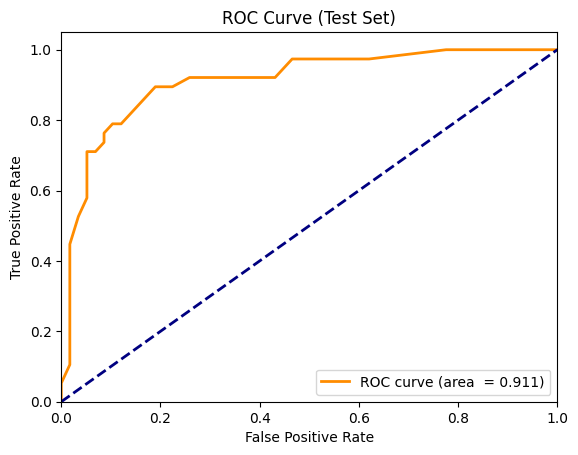

In [15]:
fpr, tpr, _ = roc_curve(y_test, test_probs[:, 1])
roc_auc = auc(fpr, tpr)
print(f"test Set ROC-AUC Score: {roc_auc:.3f}")

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area  = {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()

**Unnormalized and Normalized Confusion Matrix**

Confusion Matrix for Test Set:
[[48 10]
 [ 5 33]]


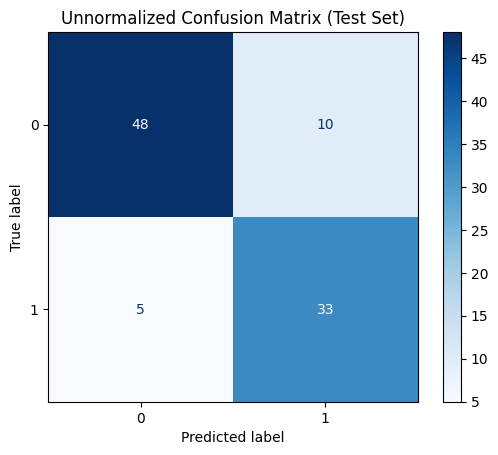

[58 38]
[[58. 58.]
 [38. 38.]]


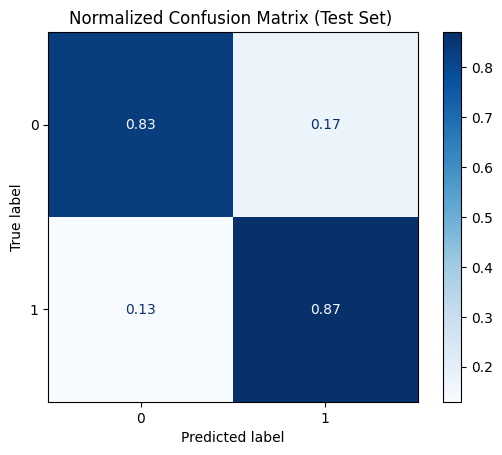

In [16]:
test_matrix = confusion_matrix(y_test, test_predictions)
print('Confusion Matrix for Test Set:')
print(test_matrix)
disp_test = ConfusionMatrixDisplay(test_matrix)
disp_test.plot(cmap=plt.cm.Blues)
plt.title("Unnormalized Confusion Matrix (Test Set)")
plt.show()

divisor = np.zeros((2,2))
divisor[0][:] = test_matrix.sum(axis=1)[0]
divisor[1][:] = test_matrix.sum(axis=1)[1]
test_matrix_normalised = np.divide(test_matrix, divisor)
print(np.transpose((test_matrix.sum(axis=1))))
print(divisor)

test_matrix_normalised = np.round(test_matrix_normalised, 2)
disp = ConfusionMatrixDisplay(test_matrix_normalised)
disp.plot(cmap=plt.cm.Blues, values_format="")
plt.title("Normalized Confusion Matrix (Test Set) ")
plt.show()

**Precision, Recall, F1-score**

In [17]:
TP = np.diag(test_matrix)
FP = test_matrix.sum(axis=0) - TP
FN = test_matrix.sum(axis=1) - TP
precision_per_class = TP / (TP + FP)
recall_per_class = TP / (TP + FN)
f1_per_class = 2 * (precision_per_class * recall_per_class) / (precision_per_class + recall_per_class)
precision = np.mean(precision_per_class)
recall = np.mean(recall_per_class)
f1 = np.mean(f1_per_class)
print(f"Test Set Precision : {precision:.3f}")
print(f"Test Set Recall : {recall:.3f}")
print(f"Test Set F1-score : {f1:.3f}")

Test Set Precision : 0.837
Test Set Recall : 0.848
Test Set F1-score : 0.840
